In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

## 01. Load the Data in the file - "assignment_python.csv" given to you as a .csv using Pandas

In [2]:
df = pd.read_csv("assignment_python.csv", parse_dates=['REGISTRATION_DATE','DEPOSIT_DATE'])
df.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29


## 02. Understand the data using the columns given (metadata descriptions below)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22065 entries, 0 to 22064
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   IDCUSTOMER            22065 non-null  int64         
 1   GENDER                22065 non-null  object        
 2   CITY                  22065 non-null  object        
 3   COUNTRY               22065 non-null  object        
 4   FIRST_DEPOSIT_AMOUNT  22065 non-null  float64       
 5   REGISTRATION_DATE     22065 non-null  datetime64[ns]
 6   DEPOSIT_DATE          22065 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [4]:
df.describe()

,IDCUSTOMER,FIRST_DEPOSIT_AMOUNT
count,2.206500e+04,22065.000000
mean,1.380593e+08,284.806530
std,3.272693e+07,943.993064
min,5.075649e+06,0.380000
25%,1.459097e+08,70.000000
50%,1.465139e+08,100.000000
75%,1.471483e+08,250.000000
max,1.478480e+08,100000.000000


In [5]:
df.columns

Index(['IDCUSTOMER', 'GENDER', 'CITY', 'COUNTRY', 'FIRST_DEPOSIT_AMOUNT',
       'REGISTRATION_DATE', 'DEPOSIT_DATE'],
      dtype='object')

## 03. Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime' & what is the lifetime in days for customer ID - 5371454

In [6]:
# creating a function to calculate 'Customer Lifetime'
def customer_lifetime (date):
    num_of_days = pd.to_datetime('today').normalize()-date
    # adding one to the number of days includes the starting date also
    return str(num_of_days.days+1)+' days'

In [7]:
# applying the function 'customer_lifetime' to deposit date column
df['Customer Lifetime'] = df['DEPOSIT_DATE'].apply(customer_lifetime)
df.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Customer Lifetime
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,105 days
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,219 days
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,139 days
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,219 days
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,112 days


In [8]:
idx_loc = df[df['IDCUSTOMER'] == 5371454].index.values.astype(int)[0]
idx_loc

4

In [9]:
print(f"lifetime in days for customer ID - 5371454 is: {df.loc[idx_loc]['Customer Lifetime']}")

lifetime in days for customer ID - 5371454 is: 112 days


## 04. Find the city & country with the highest number of unique customers

In [10]:
max_unique_customers = df.groupby(by=['COUNTRY','CITY']).nunique()['IDCUSTOMER'].max()
max_unique_customers_country = df.groupby(by=['COUNTRY','CITY']).nunique()['IDCUSTOMER'].idxmax()[0]
max_unique_customers_city = df.groupby(by=['COUNTRY','CITY']).nunique()['IDCUSTOMER'].idxmax()[1]

In [11]:
print(f"The city '{max_unique_customers_city}' & country '{max_unique_customers_country}' is having the highest number of unique customers of: [{max_unique_customers}].")

The city 'İstanbul' & country 'Turkey' is having the highest number of unique customers of: [4770].


## 05. Find the unique count of players in each country (in descending order) & specify the number of unique players from the city - Kayseri

In [12]:
# Note:
# There is no column for players given in the "assignment_python.csv" dataset.
# But assuming the "players" to be the "customers" the following problem has been proceeded by taking "IDCUSTOMER" column.
df['COUNTRY'].unique()
# There is only one unique country which is 'Turkey'. So, "Find the unique count of players in each country (in descending order)" cannot be answred.

array(['Turkey'], dtype=object)

In [13]:
df.groupby(by=['COUNTRY']).nunique()['IDCUSTOMER']

COUNTRY
Turkey    22065
Name: IDCUSTOMER, dtype: int64

In [14]:
unique_players_at_Kayseri = df.groupby(by=['CITY']).nunique()['IDCUSTOMER'].loc['Kayseri']
unique_players_at_Kayseri

369

In [15]:
# Assuming the "players" to be the "customers"
print(f"The number of unique players from the city - Kayseri is: {unique_players_at_Kayseri}")

The number of unique players from the city - Kayseri is: 369


## 06. Which city gives the third highest average first_deposit_amount and what is the average amount?

In [16]:
df.groupby(by=['CITY']).mean()['FIRST_DEPOSIT_AMOUNT'].nlargest(3)

CITY
Atasehir -İstanbul    100000.0
Seyhan/Adana           10000.0
sarıçam/Adana           9000.0
Name: FIRST_DEPOSIT_AMOUNT, dtype: float64

In [17]:
max_avg_first_deposit_amount_city = df.groupby(by=['CITY']).mean()['FIRST_DEPOSIT_AMOUNT'].nlargest(3).index.values[-1]
max_avg_first_deposit_amount = df.groupby(by=['CITY']).mean()['FIRST_DEPOSIT_AMOUNT'].nlargest(3)[-1]

In [18]:
print(f"'{max_avg_first_deposit_amount_city}' is the city having the third highest average first_deposit_amount of: [{max_avg_first_deposit_amount}]")

'sarıçam/Adana' is the city having the third highest average first_deposit_amount of: [9000.0]


## 07. Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count) and make a large plot (clearly visible) and make sure the title and labels are clearly visible.

In [19]:
unique_customers_top_40_cities = df.groupby(by=['CITY']).nunique()[['IDCUSTOMER']].sort_values(by=['IDCUSTOMER'], ascending=False).head(40)

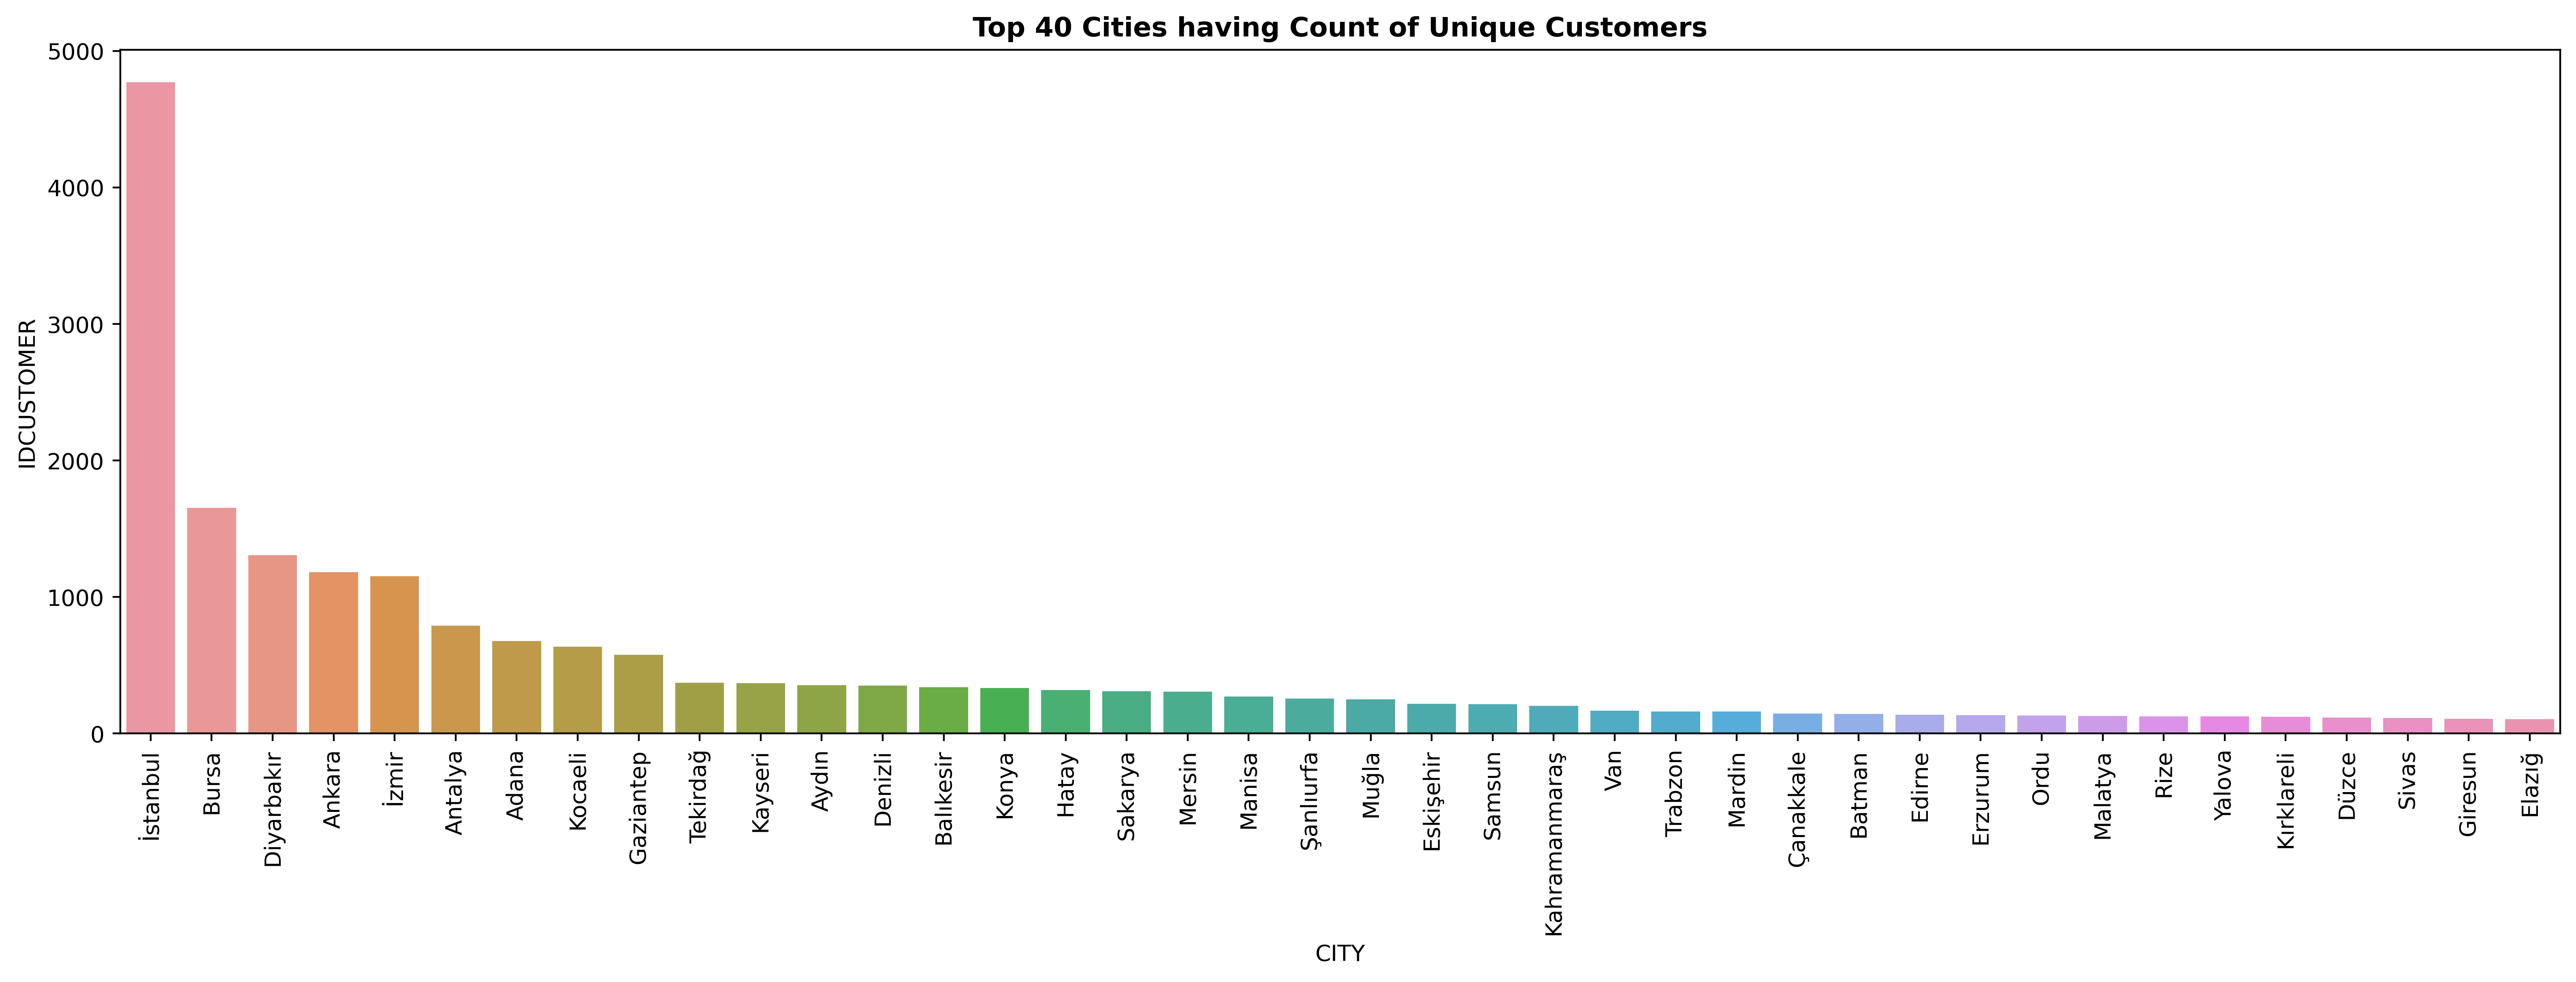

In [20]:
plt.figure(figsize=(16,6), dpi=400)
fontsize = 12
sns.barplot(data=unique_customers_top_40_cities,x=unique_customers_top_40_cities.index,y='IDCUSTOMER')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Top 40 Cities having Count of Unique Customers", fontweight="bold", fontdict={'fontsize': fontsize})
plt.savefig("Top 40 Cities having Count of Unique Customers.jpg");

## 08. Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.

In [21]:
df.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Customer Lifetime
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,105 days
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,219 days
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,139 days
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,219 days
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,112 days


In [22]:
df_copy = df.copy(deep=True)

In [23]:
df_copy.set_index('DEPOSIT_DATE', inplace=True)
df_copy.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,Customer Lifetime
DEPOSIT_DATE,,,,,,,
2022-06-05,5075649,M,ankara,Turkey,100.0,2009-01-10,105 days
2022-02-11,5176235,M,elazığ,Turkey,400.0,2009-03-01,219 days
2022-05-02,5249140,M,izmir,Turkey,200.0,2009-04-06,139 days
2022-02-11,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,219 days
2022-05-29,5371454,M,sakarya,Turkey,880.0,2009-06-07,112 days


In [24]:
df_copy_resampled = df_copy.resample(rule='M').nunique()
df_copy_resampled.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,Customer Lifetime
DEPOSIT_DATE,,,,,,,
2022-01-31,2555,2,121,1,179,333,31
2022-02-28,3202,2,127,1,237,395,28
2022-03-31,3790,2,138,1,223,416,31
2022-04-30,3386,2,130,1,213,432,30
2022-05-31,2983,2,117,1,209,346,31


In [25]:
# Check for dupicates in 'IDCUSTOMER' cloumn
print(df['IDCUSTOMER'].nunique(), len(df))
print(df['IDCUSTOMER'].duplicated().sum())
print(df['IDCUSTOMER'].duplicated().any() )

22065 22065
0
False


In [26]:
# Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month

df_copy_resampled['CONVERSION_PERCENT'] = df_copy_resampled['FIRST_DEPOSIT_AMOUNT']/df_copy_resampled['IDCUSTOMER'] 
df_copy_resampled

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,Customer Lifetime,CONVERSION_PERCENT
DEPOSIT_DATE,,,,,,,,
2022-01-31,2555,2,121,1,179,333,31,0.070059
2022-02-28,3202,2,127,1,237,395,28,0.074016
2022-03-31,3790,2,138,1,223,416,31,0.058839
2022-04-30,3386,2,130,1,213,432,30,0.062906
2022-05-31,2983,2,117,1,209,346,31,0.070064
2022-06-30,1839,2,95,1,164,187,30,0.089179
2022-07-31,1842,3,94,1,146,71,31,0.079262
2022-08-31,2468,2,91,1,170,73,31,0.068882


In [27]:
df_copy_resampled.set_index(df_copy_resampled.index.strftime('%B %Y'), inplace=True)
df_copy_resampled

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,Customer Lifetime,CONVERSION_PERCENT
DEPOSIT_DATE,,,,,,,,
January 2022,2555,2,121,1,179,333,31,0.070059
February 2022,3202,2,127,1,237,395,28,0.074016
March 2022,3790,2,138,1,223,416,31,0.058839
April 2022,3386,2,130,1,213,432,30,0.062906
May 2022,2983,2,117,1,209,346,31,0.070064
June 2022,1839,2,95,1,164,187,30,0.089179
July 2022,1842,3,94,1,146,71,31,0.079262
August 2022,2468,2,91,1,170,73,31,0.068882


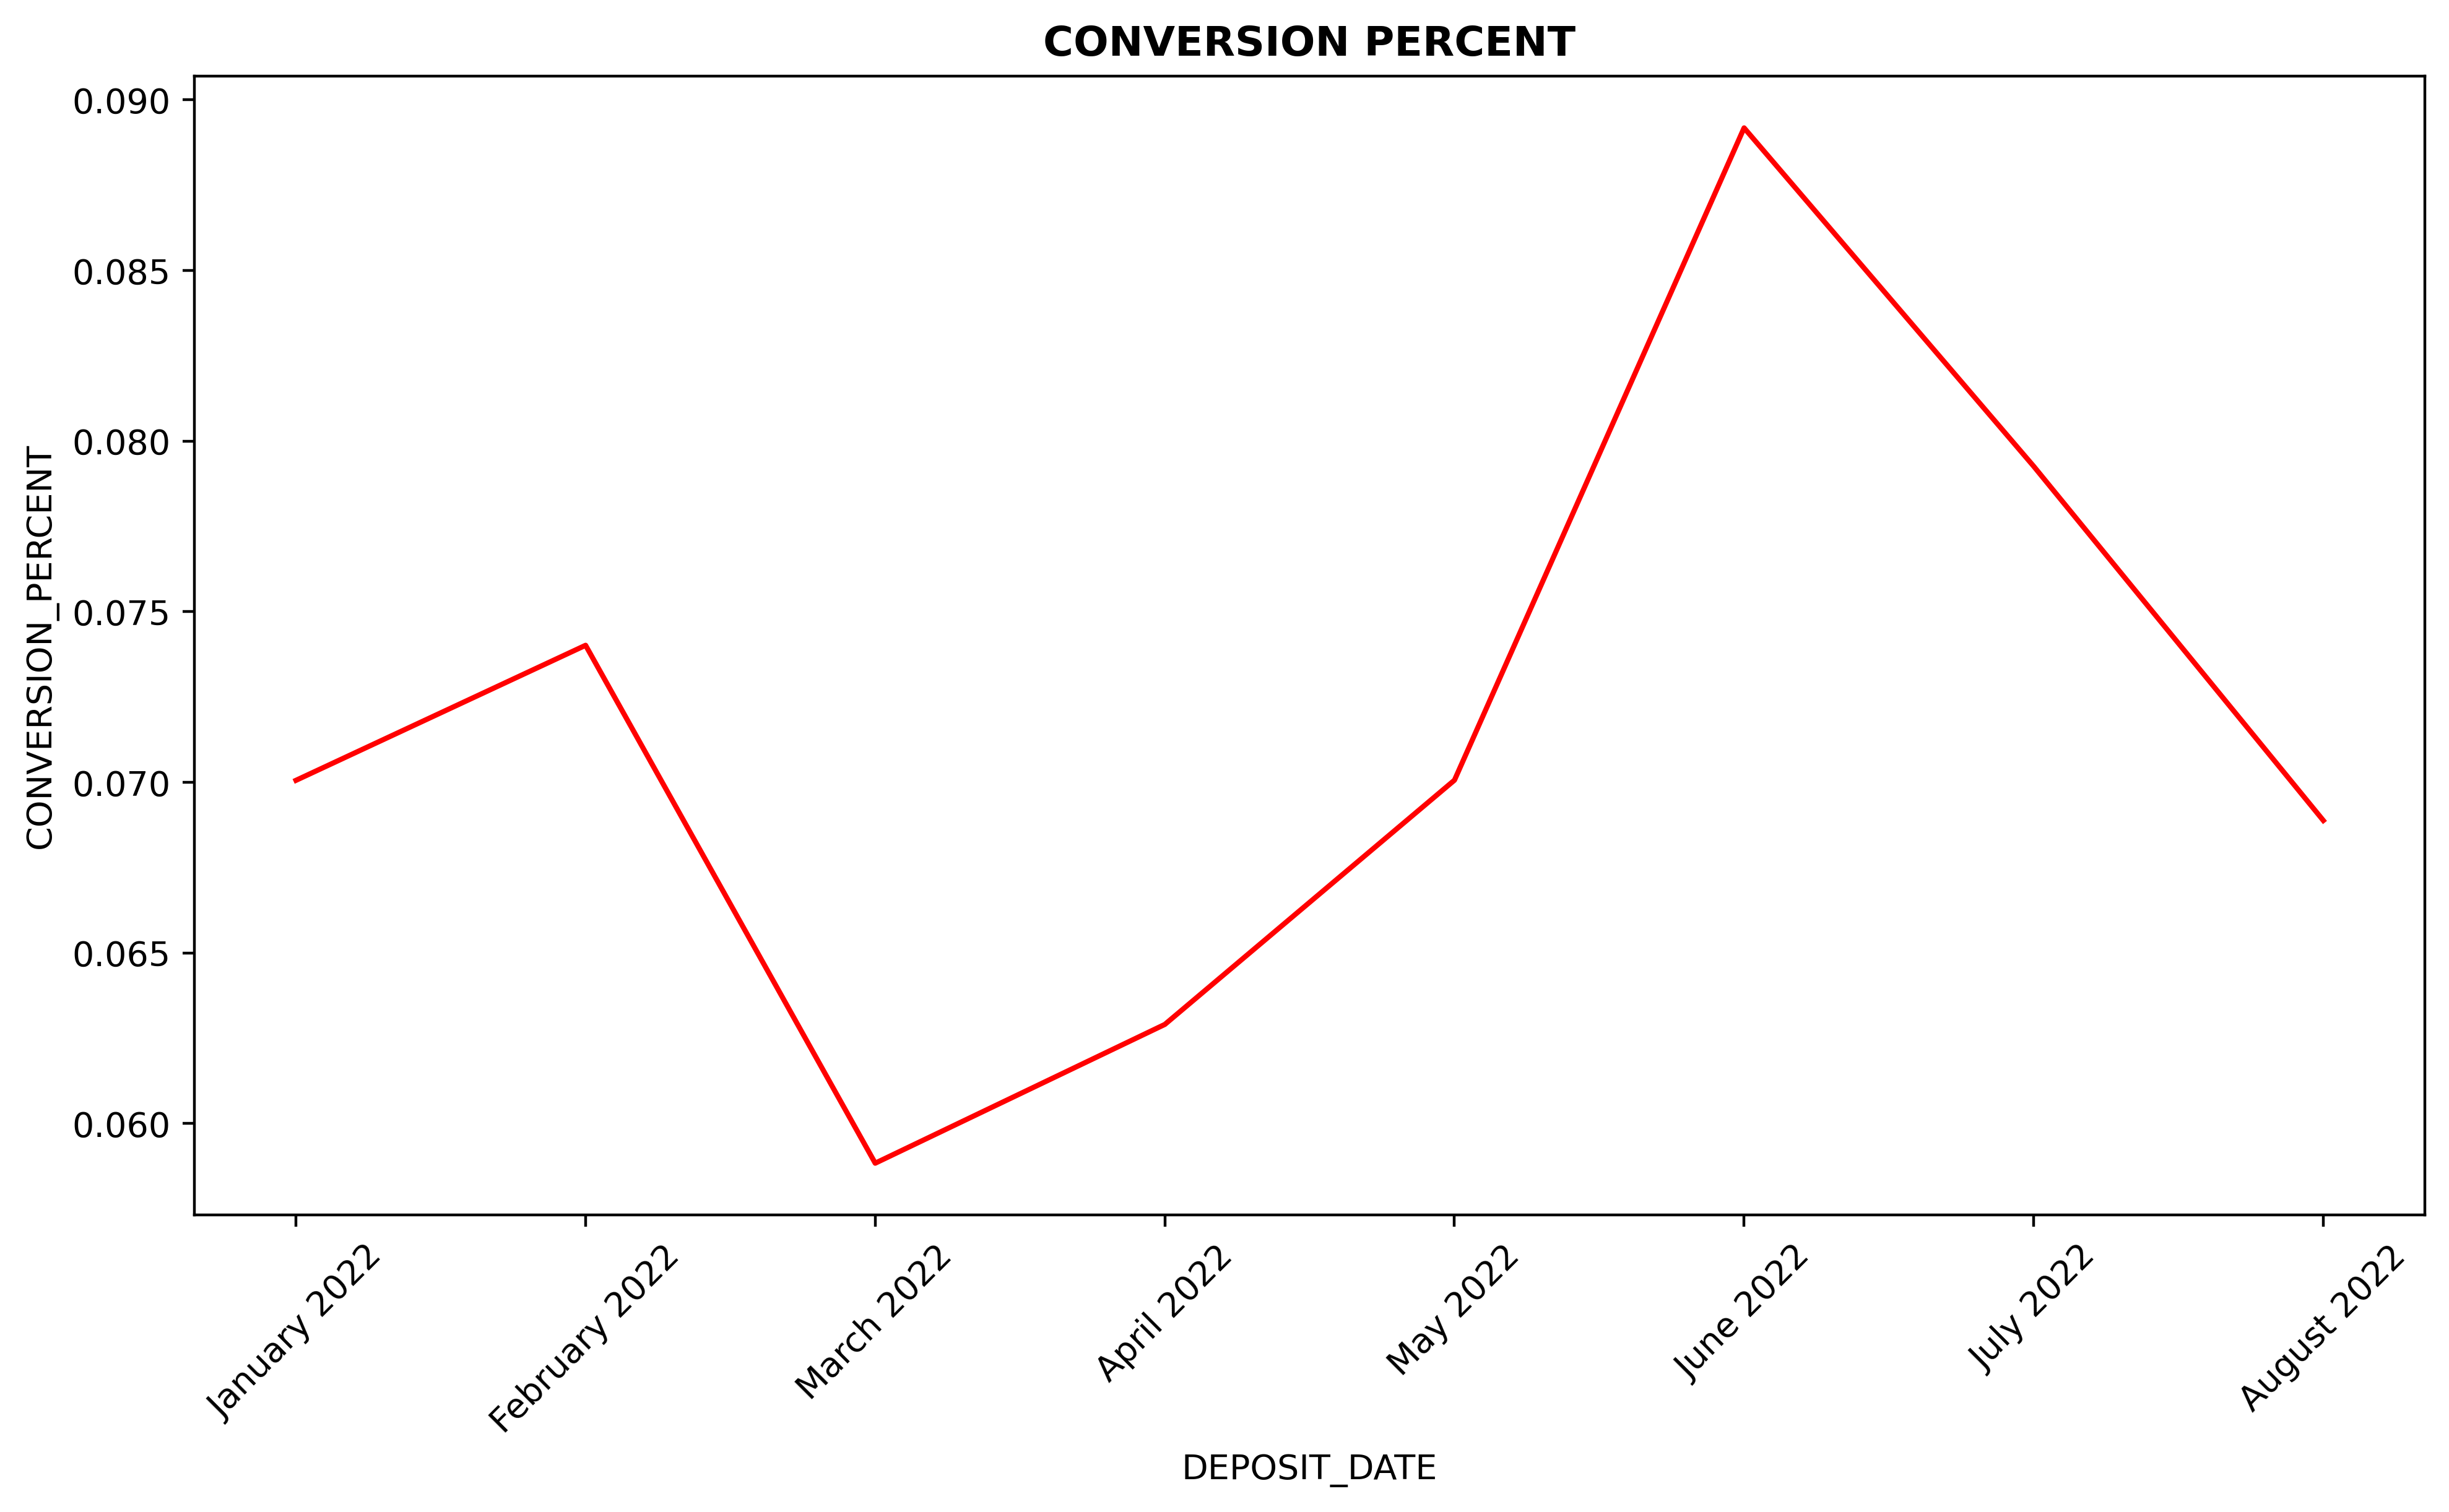

In [28]:
plt.figure(figsize=(10,6), dpi=400)
fontsize = 12
sns.lineplot(data=df_copy_resampled,x=df_copy_resampled.index,y='CONVERSION_PERCENT', color='red')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("CONVERSION PERCENT", fontweight="bold", fontdict={'fontsize': fontsize})
plt.savefig("CONVERSION PERCENT.jpg");

## 09. What was the conversion rate in June 2022, limit the answer to 2 decimal places. (in %)

In [29]:
conversion_rate_June_2022=np.round(df_copy_resampled.loc['June 2022']['CONVERSION_PERCENT'], 2)
conversion_rate_June_2022

0.09

In [30]:
print(f"The conversion rate in June 2022 is: {conversion_rate_June_2022}")

The conversion rate in June 2022 is: 0.09


## 10. Make a copy of the original data in the file assignment_python as a pandas dataframe called 'df_ft' and generate the following columns:

In [31]:
df_ft = df.copy(deep=True)
df_ft.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Customer Lifetime
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,105 days
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,219 days
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,139 days
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,219 days
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,112 days


## 10A. week of day column from the deposit date column

In [32]:
df_ft['WEEK_OF_DAY'] = df_ft['DEPOSIT_DATE'].dt.day_name()
df_ft.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Customer Lifetime,WEEK_OF_DAY
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,105 days,Sunday
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,219 days,Friday
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,139 days,Monday
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,219 days,Friday
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,112 days,Sunday


## 10B. descriptive statistics of the table

In [33]:
profile_report = ProfileReport(df_ft)

In [34]:
profile_report.widgets

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## 10C. make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.

In [35]:
bins = np.array(range(0,100001,500))
bins

array([     0,    500,   1000,   1500,   2000,   2500,   3000,   3500,
         4000,   4500,   5000,   5500,   6000,   6500,   7000,   7500,
         8000,   8500,   9000,   9500,  10000,  10500,  11000,  11500,
        12000,  12500,  13000,  13500,  14000,  14500,  15000,  15500,
        16000,  16500,  17000,  17500,  18000,  18500,  19000,  19500,
        20000,  20500,  21000,  21500,  22000,  22500,  23000,  23500,
        24000,  24500,  25000,  25500,  26000,  26500,  27000,  27500,
        28000,  28500,  29000,  29500,  30000,  30500,  31000,  31500,
        32000,  32500,  33000,  33500,  34000,  34500,  35000,  35500,
        36000,  36500,  37000,  37500,  38000,  38500,  39000,  39500,
        40000,  40500,  41000,  41500,  42000,  42500,  43000,  43500,
        44000,  44500,  45000,  45500,  46000,  46500,  47000,  47500,
        48000,  48500,  49000,  49500,  50000,  50500,  51000,  51500,
        52000,  52500,  53000,  53500,  54000,  54500,  55000,  55500,
      

In [36]:
labels = []
i = 1
while i in range(len(bins)):
    label = str(bins[i-1])+'-'+str(bins[i])
    labels.append(label)
    i += 1
    
labels

['0-500',
 '500-1000',
 '1000-1500',
 '1500-2000',
 '2000-2500',
 '2500-3000',
 '3000-3500',
 '3500-4000',
 '4000-4500',
 '4500-5000',
 '5000-5500',
 '5500-6000',
 '6000-6500',
 '6500-7000',
 '7000-7500',
 '7500-8000',
 '8000-8500',
 '8500-9000',
 '9000-9500',
 '9500-10000',
 '10000-10500',
 '10500-11000',
 '11000-11500',
 '11500-12000',
 '12000-12500',
 '12500-13000',
 '13000-13500',
 '13500-14000',
 '14000-14500',
 '14500-15000',
 '15000-15500',
 '15500-16000',
 '16000-16500',
 '16500-17000',
 '17000-17500',
 '17500-18000',
 '18000-18500',
 '18500-19000',
 '19000-19500',
 '19500-20000',
 '20000-20500',
 '20500-21000',
 '21000-21500',
 '21500-22000',
 '22000-22500',
 '22500-23000',
 '23000-23500',
 '23500-24000',
 '24000-24500',
 '24500-25000',
 '25000-25500',
 '25500-26000',
 '26000-26500',
 '26500-27000',
 '27000-27500',
 '27500-28000',
 '28000-28500',
 '28500-29000',
 '29000-29500',
 '29500-30000',
 '30000-30500',
 '30500-31000',
 '31000-31500',
 '31500-32000',
 '32000-32500',
 '32

In [37]:
df_ft['FIRST_DEPOSIT_AMOUNT_BINNED'] = pd.cut(df_ft['FIRST_DEPOSIT_AMOUNT'], bins=bins, labels=labels)
df_ft.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,Customer Lifetime,WEEK_OF_DAY,FIRST_DEPOSIT_AMOUNT_BINNED
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,105 days,Sunday,0-500
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,219 days,Friday,0-500
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,139 days,Monday,0-500
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,219 days,Friday,0-500
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,112 days,Sunday,500-1000


## 11. Find a 7 days moving average of number of registrations. (calculating an average of the T-7 days for every week's total registrations)

## For the 11th question I'm little bit confused Sir. So, so I get two solutions. Kindly suggest me which one is the correct solution

## Solution 1

In [38]:
# Calculating average of the T-7 days for every week's total registrations\
df_ft.set_index('REGISTRATION_DATE', inplace=True)
df_ft

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,DEPOSIT_DATE,Customer Lifetime,WEEK_OF_DAY,FIRST_DEPOSIT_AMOUNT_BINNED
REGISTRATION_DATE,,,,,,,,,
2009-01-10,5075649,M,ankara,Turkey,100.0,2022-06-05,105 days,Sunday,0-500
2009-03-01,5176235,M,elazığ,Turkey,400.0,2022-02-11,219 days,Friday,0-500
2009-04-06,5249140,M,izmir,Turkey,200.0,2022-05-02,139 days,Monday,0-500
2009-05-02,5300998,M,Üsküdar,Turkey,100.0,2022-02-11,219 days,Friday,0-500
2009-06-07,5371454,M,sakarya,Turkey,880.0,2022-05-29,112 days,Sunday,500-1000
...,...,...,...,...,...,...,...,...,...
2022-08-31,147844121,M,İstanbul,Turkey,50.0,2022-08-31,18 days,Wednesday,0-500
2022-08-31,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,18 days,Wednesday,0-500
2022-08-31,147846481,M,Van,Turkey,100.0,2022-08-31,18 days,Wednesday,0-500


In [39]:
df_ft.resample('W').count()[['IDCUSTOMER']]/7

,IDCUSTOMER
REGISTRATION_DATE,
2009-01-11,0.142857
2009-01-18,0.000000
2009-01-25,0.000000
2009-02-01,0.000000
2009-02-08,0.000000
...,...
2022-08-07,82.285714
2022-08-14,85.285714
2022-08-21,73.000000


## Solution 2

In [40]:
# Find a 7 days moving average of number of registrations

In [41]:
df_ft_resampled = df_ft.resample('D').count()
df_ft_resampled

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,DEPOSIT_DATE,Customer Lifetime,WEEK_OF_DAY,FIRST_DEPOSIT_AMOUNT_BINNED
REGISTRATION_DATE,,,,,,,,,
2009-01-10,1,1,1,1,1,1,1,1,1
2009-01-11,0,0,0,0,0,0,0,0,0
2009-01-12,0,0,0,0,0,0,0,0,0
2009-01-13,0,0,0,0,0,0,0,0,0
2009-01-14,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2022-08-27,67,67,67,67,67,67,67,67,67
2022-08-28,83,83,83,83,83,83,83,83,83
2022-08-29,55,55,55,55,55,55,55,55,55


In [42]:
df_ft_resampled.rolling(7).mean()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,DEPOSIT_DATE,Customer Lifetime,WEEK_OF_DAY,FIRST_DEPOSIT_AMOUNT_BINNED
REGISTRATION_DATE,,,,,,,,,
2009-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-08-27,69.714286,69.714286,69.714286,69.714286,69.714286,69.714286,69.714286,69.714286,69.714286
2022-08-28,72.285714,72.285714,72.285714,72.285714,72.285714,72.285714,72.285714,72.285714,72.285714
2022-08-29,69.857143,69.857143,69.857143,69.857143,69.857143,69.857143,69.857143,69.857143,69.857143
